Inspired by https://machinelearningmastery.com/how-to-develop-a-face-recognition-system-using-facenet-in-keras-and-an-svm-classifier/ and https://github.com/TessFerrandez/research-papers/blob/prod/facenet/FaceNet.ipynb

In [1]:
import tensorflow as tf

def LRN2D(x):
    # adapted from https://github.com/TessFerrandez/research-papers/tree/prod/facenet
    return tf.nn.local_response_normalization(x, depth_radius=5, bias=1, alpha=1e-4, beta=0.75)

def conv2d_bn(x,layer=None, cv1_out=None, cv1_filter=(1, 1), cv1_strides=(1, 1), cv2_out=None, cv2_filter=(3, 3),
              cv2_strides=(1, 1), padding=None):
    # adapted from https://github.com/TessFerrandez/research-papers/tree/prod/facenet

    num = '' if cv2_out == None else '1'
    tensor = tf.keras.layers.Conv2D(cv1_out, cv1_filter, strides=cv1_strides, name=layer+'_conv'+num)(x)
    tensor = tf.keras.layers.BatchNormalization(axis=3, epsilon=0.00001, name=layer+'_bn'+num)(tensor)
    tensor = tf.keras.layers.Activation('relu')(tensor)
    if padding == None:
        return tensor

    tensor = tf.keras.layers.ZeroPadding2D(padding=padding)(tensor)

    if cv2_out == None:
        return tensor

    tensor = tf.keras.layers.Conv2D(cv2_out, cv2_filter, strides=cv2_strides, name=layer+'_conv'+'2')(tensor)
    tensor = tf.keras.layers.BatchNormalization(axis=3, epsilon=0.00001, name=layer+'_bn'+'2')(tensor)
    tensor = tf.keras.layers.Activation('relu')(tensor)

    return tensor


def facenet_tf2():

    # adapted from https://github.com/TessFerrandez/research-papers/tree/prod/facenet

    modelInput = tf.keras.Input(shape=(96, 96, 3))
    x = tf.keras.layers.ZeroPadding2D(padding=(3, 3), input_shape=(96, 96, 3))(modelInput)
    x = tf.keras.layers.Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(x)
    x = tf.keras.layers.BatchNormalization(axis=3, epsilon=0.00001, name='bn1')(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.ZeroPadding2D(padding=(1, 1))(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=3, strides=2)(x)
    x = tf.keras.layers.Lambda(LRN2D, name='lrn_1')(x)
    x = tf.keras.layers.Conv2D(64, (1, 1), name='conv2')(x)
    x = tf.keras.layers.BatchNormalization(axis=3, epsilon=0.00001, name='bn2')(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.ZeroPadding2D(padding=(1, 1))(x)
    x = tf.keras.layers.Conv2D(192, (3, 3), name='conv3')(x)
    x = tf.keras.layers.BatchNormalization(axis=3, epsilon=0.00001, name='bn3')(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Lambda(LRN2D, name='lrn_2')(x)
    x = tf.keras.layers.ZeroPadding2D(padding=(1, 1))(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=3, strides=2)(x)

    # Inception3a
    inception_3a_3x3 = tf.keras.layers.Conv2D(96, (1, 1), name='inception_3a_3x3_conv1')(x)
    inception_3a_3x3 = tf.keras.layers.BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_3x3_bn1')(inception_3a_3x3)
    inception_3a_3x3 = tf.keras.layers.Activation('relu')(inception_3a_3x3)
    inception_3a_3x3 = tf.keras.layers.ZeroPadding2D(padding=(1, 1))(inception_3a_3x3)
    inception_3a_3x3 = tf.keras.layers.Conv2D(128, (3, 3), name='inception_3a_3x3_conv2')(inception_3a_3x3)
    inception_3a_3x3 = tf.keras.layers.BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_3x3_bn2')(inception_3a_3x3)
    inception_3a_3x3 = tf.keras.layers.Activation('relu')(inception_3a_3x3)

    inception_3a_5x5 = tf.keras.layers.Conv2D(16, (1, 1), name='inception_3a_5x5_conv1')(x)
    inception_3a_5x5 = tf.keras.layers.BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_5x5_bn1')(inception_3a_5x5)
    inception_3a_5x5 = tf.keras.layers.Activation('relu')(inception_3a_5x5)
    inception_3a_5x5 = tf.keras.layers.ZeroPadding2D(padding=(2, 2))(inception_3a_5x5)
    inception_3a_5x5 = tf.keras.layers.Conv2D(32, (5, 5), name='inception_3a_5x5_conv2')(inception_3a_5x5)
    inception_3a_5x5 = tf.keras.layers.BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_5x5_bn2')(inception_3a_5x5)
    inception_3a_5x5 = tf.keras.layers.Activation('relu')(inception_3a_5x5)

    inception_3a_pool = tf.keras.layers.MaxPooling2D(pool_size=3, strides=2)(x)
    inception_3a_pool = tf.keras.layers.Conv2D(32, (1, 1), name='inception_3a_pool_conv')(inception_3a_pool)
    inception_3a_pool = tf.keras.layers.BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_pool_bn')(inception_3a_pool)
    inception_3a_pool = tf.keras.layers.Activation('relu')(inception_3a_pool)
    inception_3a_pool = tf.keras.layers.ZeroPadding2D(padding=((3, 4), (3, 4)))(inception_3a_pool)
    inception_3a_1x1 = tf.keras.layers.Conv2D(64, (1, 1), name='inception_3a_1x1_conv')(x)
    inception_3a_1x1 = tf.keras.layers.BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_1x1_bn')(inception_3a_1x1)
    inception_3a_1x1 = tf.keras.layers.Activation('relu')(inception_3a_1x1)

    inception_3a = tf.keras.layers.concatenate([inception_3a_3x3, inception_3a_5x5, inception_3a_pool, inception_3a_1x1], axis=3)


    # Inception3b
    inception_3b_3x3 = tf.keras.layers.Conv2D(96, (1, 1), name='inception_3b_3x3_conv1')(inception_3a)
    inception_3b_3x3 = tf.keras.layers.BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_3x3_bn1')(inception_3b_3x3)
    inception_3b_3x3 = tf.keras.layers.Activation('relu')(inception_3b_3x3)
    inception_3b_3x3 = tf.keras.layers.ZeroPadding2D(padding=(1, 1))(inception_3b_3x3)
    inception_3b_3x3 = tf.keras.layers.Conv2D(128, (3, 3), name='inception_3b_3x3_conv2')(inception_3b_3x3)
    inception_3b_3x3 = tf.keras.layers.BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_3x3_bn2')(inception_3b_3x3)
    inception_3b_3x3 = tf.keras.layers.Activation('relu')(inception_3b_3x3)

    inception_3b_5x5 = tf.keras.layers.Conv2D(32, (1, 1), name='inception_3b_5x5_conv1')(inception_3a)
    inception_3b_5x5 = tf.keras.layers.BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_5x5_bn1')(inception_3b_5x5)
    inception_3b_5x5 = tf.keras.layers.Activation('relu')(inception_3b_5x5)
    inception_3b_5x5 = tf.keras.layers.ZeroPadding2D(padding=(2, 2))(inception_3b_5x5)
    inception_3b_5x5 = tf.keras.layers.Conv2D(64, (5, 5), name='inception_3b_5x5_conv2')(inception_3b_5x5)
    inception_3b_5x5 = tf.keras.layers.BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_5x5_bn2')(inception_3b_5x5)
    inception_3b_5x5 = tf.keras.layers.Activation('relu')(inception_3b_5x5)

    inception_3b_pool = tf.keras.layers.Lambda(lambda x: x**2, name='power2_3b')(inception_3a)
    inception_3b_pool = tf.keras.layers.AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_3b_pool)
    inception_3b_pool = tf.keras.layers.Lambda(lambda x: x*9, name='mult9_3b')(inception_3b_pool)
    inception_3b_pool = tf.keras.layers.Lambda(lambda x: tf.keras.backend.sqrt(x), name='sqrt_3b')(inception_3b_pool)
    inception_3b_pool = tf.keras.layers.Conv2D(64, (1, 1), name='inception_3b_pool_conv')(inception_3b_pool)
    inception_3b_pool = tf.keras.layers.BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_pool_bn')(inception_3b_pool)
    inception_3b_pool = tf.keras.layers.Activation('relu')(inception_3b_pool)
    inception_3b_pool = tf.keras.layers.ZeroPadding2D(padding=(4, 4))(inception_3b_pool)

    inception_3b_1x1 = tf.keras.layers.Conv2D(64, (1, 1), name='inception_3b_1x1_conv')(inception_3a)
    inception_3b_1x1 = tf.keras.layers.BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_1x1_bn')(inception_3b_1x1)
    inception_3b_1x1 = tf.keras.layers.Activation('relu')(inception_3b_1x1)

    inception_3b = tf.keras.layers.concatenate([inception_3b_3x3, inception_3b_5x5, inception_3b_pool, inception_3b_1x1], axis=3)


    # Inception3c
    inception_3c_3x3 = conv2d_bn(inception_3b,
                                 layer='inception_3c_3x3',
                                 cv1_out=128,
                                 cv1_filter=(1, 1),
                                 cv2_out=256,
                                 cv2_filter=(3, 3),
                                 cv2_strides=(2, 2),
                                 padding=(1, 1))

    inception_3c_5x5 = conv2d_bn(inception_3b,
                                 layer='inception_3c_5x5',
                                 cv1_out=32,
                                 cv1_filter=(1, 1),
                                 cv2_out=64,
                                 cv2_filter=(5, 5),
                                 cv2_strides=(2, 2),
                                 padding=(2, 2))

    inception_3c_pool = tf.keras.layers.MaxPooling2D(pool_size=3, strides=2)(inception_3b)
    inception_3c_pool = tf.keras.layers.ZeroPadding2D(padding=((0, 1), (0, 1)))(inception_3c_pool)

    inception_3c = tf.keras.layers.concatenate([inception_3c_3x3, inception_3c_5x5, inception_3c_pool], axis=3)


    #inception 4a
    inception_4a_3x3 = conv2d_bn(inception_3c,
                                 layer='inception_4a_3x3',
                                 cv1_out=96,
                                 cv1_filter=(1, 1),
                                 cv2_out=192,
                                 cv2_filter=(3, 3),
                                 cv2_strides=(1, 1),
                                 padding=(1, 1))
    inception_4a_5x5 = conv2d_bn(inception_3c,
                                 layer='inception_4a_5x5',
                                 cv1_out=32,
                                 cv1_filter=(1, 1),
                                 cv2_out=64,
                                 cv2_filter=(5, 5),
                                 cv2_strides=(1, 1),
                                 padding=(2, 2))
    inception_4a_pool = tf.keras.layers.Lambda(lambda x: x**2, name='power2_4a')(inception_3c)
    inception_4a_pool = tf.keras.layers.AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_4a_pool)
    inception_4a_pool = tf.keras.layers.Lambda(lambda x: x*9, name='mult9_4a')(inception_4a_pool)
    inception_4a_pool = tf.keras.layers.Lambda(lambda x: tf.keras.backend.sqrt(x), name='sqrt_4a')(inception_4a_pool)
    inception_4a_pool = conv2d_bn(inception_4a_pool,
                                  layer='inception_4a_pool',
                                  cv1_out=128,
                                  cv1_filter=(1, 1),
                                  padding=(2, 2))
    inception_4a_1x1 = conv2d_bn(inception_3c,
                                 layer='inception_4a_1x1',
                                 cv1_out=256,
                                 cv1_filter=(1, 1))
    inception_4a = tf.keras.layers.concatenate([inception_4a_3x3, inception_4a_5x5, inception_4a_pool, inception_4a_1x1], axis=3)


    #inception4e
    inception_4e_3x3 = conv2d_bn(inception_4a,
                                 layer='inception_4e_3x3',
                                 cv1_out=160,
                                 cv1_filter=(1, 1),
                                 cv2_out=256,
                                 cv2_filter=(3, 3),
                                 cv2_strides=(2, 2),
                                 padding=(1, 1))
    inception_4e_5x5 = conv2d_bn(inception_4a,
                                 layer='inception_4e_5x5',
                                 cv1_out=64,
                                 cv1_filter=(1, 1),
                                 cv2_out=128,
                                 cv2_filter=(5, 5),
                                 cv2_strides=(2, 2),
                                 padding=(2, 2))
    inception_4e_pool = tf.keras.layers.MaxPooling2D(pool_size=3, strides=2)(inception_4a)
    inception_4e_pool = tf.keras.layers.ZeroPadding2D(padding=((0, 1), (0, 1)))(inception_4e_pool)

    inception_4e = tf.keras.layers.concatenate([inception_4e_3x3, inception_4e_5x5, inception_4e_pool], axis=3)


    #inception5a
    inception_5a_3x3 = conv2d_bn(inception_4e,
                                 layer='inception_5a_3x3',
                                 cv1_out=96,
                                 cv1_filter=(1, 1),
                                 cv2_out=384,
                                 cv2_filter=(3, 3),
                                 cv2_strides=(1, 1),
                                 padding=(1, 1))

    inception_5a_pool = tf.keras.layers.Lambda(lambda x: x**2, name='power2_5a')(inception_4e)
    inception_5a_pool = tf.keras.layers.AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_5a_pool)
    inception_5a_pool = tf.keras.layers.Lambda(lambda x: x*9, name='mult9_5a')(inception_5a_pool)
    inception_5a_pool = tf.keras.layers.Lambda(lambda x: tf.keras.backend.sqrt(x), name='sqrt_5a')(inception_5a_pool)
    inception_5a_pool = conv2d_bn(inception_5a_pool,
                                  layer='inception_5a_pool',
                                  cv1_out=96,
                                  cv1_filter=(1, 1),
                                  padding=(1, 1))
    inception_5a_1x1 = conv2d_bn(inception_4e,
                                 layer='inception_5a_1x1',
                                 cv1_out=256,
                                 cv1_filter=(1, 1))

    inception_5a = tf.keras.layers.concatenate([inception_5a_3x3, inception_5a_pool, inception_5a_1x1], axis=3)


    #inception_5b
    inception_5b_3x3 = conv2d_bn(inception_5a,
                                 layer='inception_5b_3x3',
                                 cv1_out=96,
                                 cv1_filter=(1, 1),
                                 cv2_out=384,
                                 cv2_filter=(3, 3),
                                 cv2_strides=(1, 1),
                                 padding=(1, 1))
    inception_5b_pool = tf.keras.layers.MaxPooling2D(pool_size=3, strides=2)(inception_5a)
    inception_5b_pool = conv2d_bn(inception_5b_pool,
                                  layer='inception_5b_pool',
                                  cv1_out=96,
                                  cv1_filter=(1, 1))
    inception_5b_pool = tf.keras.layers.ZeroPadding2D(padding=(1, 1))(inception_5b_pool)

    inception_5b_1x1 = conv2d_bn(inception_5a,
                                 layer='inception_5b_1x1',
                                 cv1_out=256,
                                 cv1_filter=(1, 1))
    inception_5b = tf.keras.layers.concatenate([inception_5b_3x3, inception_5b_pool, inception_5b_1x1], axis=3)

    av_pool = tf.keras.layers.AveragePooling2D(pool_size=(3, 3), strides=(1, 1))(inception_5b)
    reshape_layer = tf.keras.layers.Flatten()(av_pool)
    dense_layer = tf.keras.layers.Dense(128, name='dense_layer')(reshape_layer)
    norm_layer = tf.keras.layers.Lambda(lambda  x: tf.keras.backend.l2_normalize(x, axis=1), name='norm_layer')(dense_layer)

    model = tf.keras.Model(inputs=[modelInput], outputs=norm_layer)

    return model

In [2]:
model = facenet_tf2()

In [3]:
model.load_weights('../weights/nn4.small2.v1.h5')

## Face detection

In [4]:
# function for face detection with mtcnn
from PIL import Image
import numpy as np
from mtcnn.mtcnn import MTCNN

# extract a single face from a given photograph
def extract_face(filename, required_size=(96, 96)): #required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

# load the photo and extract the face
pixels = extract_face('../images/yj_photo.jpg')

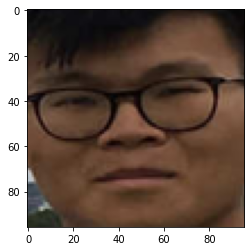

In [5]:
import matplotlib.pyplot as plt

plt.imshow(pixels)

## Face embedding

In [6]:
from numpy import expand_dims

# get the face embedding for one face
def get_embedding(model, face_pixels):

    # scale pixel values
    face_pixels = face_pixels.astype('float32')
    # standardize pixel values across channels (global)
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    
    # transform face into one sample
    samples = expand_dims(face_pixels, axis=0)
    
    # make prediction to get embedding
    yhat = model.predict(samples)
    return yhat[0]

In [7]:
embedding = get_embedding(model, pixels)

In [8]:
print(embedding)

[-6.65734932e-02  2.09318340e-01 -4.12600711e-02 -2.44254004e-02
  1.41804190e-02  1.32391840e-01 -1.15658410e-01 -1.08490996e-01
 -6.70479983e-02  6.46914029e-03  1.98851270e-03 -5.80753237e-02
  4.07584757e-02  1.33423023e-02  5.26874959e-02 -9.60468408e-03
  3.91204655e-02  2.62048468e-02  9.36718099e-03  1.10102654e-01
 -1.99643206e-02 -5.63173182e-02  1.55544028e-01  7.17362612e-02
 -2.27886699e-02 -3.47575657e-02 -7.05309361e-02 -6.16547465e-02
  8.59612226e-02 -2.93760635e-02  1.37852296e-01  5.63520081e-02
  7.26628751e-02  2.75810733e-02  5.45341037e-02  1.88920885e-01
  9.32698175e-02  1.49956346e-01 -5.16498312e-02 -2.83783544e-02
 -1.16215032e-02 -2.94117369e-02 -7.32841389e-03 -4.32065800e-02
 -1.13547198e-01  1.06017292e-01  1.97216660e-01  9.48942676e-02
 -1.53717041e-01  7.35948309e-02 -8.89727548e-02  7.77399689e-02
  6.31405599e-03  2.40328512e-03  5.76603264e-02  5.21539301e-02
  5.67938685e-02  3.69966142e-02  1.58629660e-02 -1.22264899e-01
 -1.81133360e-01  1.10920

In [9]:
len(embedding)

128

## Analysis of the embeddings from Celebrity faces dataset

https://www.kaggle.com/dansbecker/5-celebrity-faces-dataset

In [10]:
import os

In [22]:
data_path = '../dataset/5-celebrity-faces-dataset/val/'
face_embeddings_dict = {}

for actor in os.listdir(data_path):
    face_embeddings_dict[actor] = []
    
    # enumerate files
    for image in os.listdir(data_path + actor):
        # path
        path = data_path + actor + "/" + image
        # get face
        face = extract_face(path)
        # get the embedding
        embedding = get_embedding(model, face)
        
        # append
        face_embeddings_dict[actor].append(embedding)

In [23]:
dissimilarity_avg = []

for actor in face_embeddings_dict.keys():
    
    dissimilarity_actor_avgs = []
    
    print(actor)
    
    for i in range(0, len(face_embeddings_dict[actor])):
        
        reference_embedding = face_embeddings_dict[actor][i]
        dissimilarity_actor = face_embeddings_dict[actor] - reference_embedding 
        
        dissimilarity_actor_avgs.append(dissimilarity_actor)
        
    avg_per_fold = [np.sum(np.linalg.norm(dissimilarity_actor_avgs[fold], axis = 1))/(len(dissimilarity_actor_avgs[fold])-1) for fold in range(0, len(dissimilarity_actor_avgs))]
    dissimilarity_avg.append(np.mean(avg_per_fold))

mindy_kaling
madonna
elton_john
ben_afflek
jerry_seinfeld


In [24]:
threshold = np.mean(dissimilarity_avg) + np.std(dissimilarity_avg)
threshold

0.47690691323857587

In [25]:
np.linalg.norm(face_embeddings_dict[actor][0] - reference_embedding)

0.36711466

In [26]:
def verifyID(ref_img, cap_img, threshold = 0.5):
    
    if np.linalg.norm(ref_img - cap_img) < threshold:
        return True
    
    return False

## Generation of an initial database

In [40]:
from flask import jsonify
from random import randrange

In [28]:
face_embeddings_dict

{'mindy_kaling': [array([-2.43134834e-02,  1.75150976e-01, -4.42853421e-02, -3.97576019e-02,
          3.46335955e-02,  1.96196541e-01, -3.43704037e-02, -4.68110144e-02,
         -4.70357109e-03, -1.21128997e-02,  4.90299277e-02, -5.32160103e-02,
          8.01019892e-02, -4.14266549e-02,  4.28490750e-02,  3.49644013e-02,
         -7.70608038e-02,  5.03900945e-02, -1.81655049e-01,  6.74716979e-02,
          6.58858046e-02, -9.43476260e-02,  1.54580995e-01,  2.56702770e-02,
          1.38409194e-02, -1.05804764e-01, -1.06710926e-01, -8.97455812e-02,
          2.47941818e-02, -4.19806279e-02,  1.65191621e-01,  6.86161891e-02,
         -1.15582058e-02,  9.59455892e-02, -9.54016857e-03,  1.32646099e-01,
          2.21575116e-04,  1.46352455e-01, -4.19158824e-02,  2.50955001e-02,
          3.45297083e-02, -7.12183341e-02,  4.65431437e-03,  1.91006139e-02,
         -1.09470360e-01, -6.50203675e-02,  1.28046170e-01,  5.95588088e-02,
         -1.47889763e-01,  1.09427869e-01, -5.66450544e-02, 

In [32]:
face_embeddings_dict.keys()

dict_keys(['mindy_kaling', 'madonna', 'elton_john', 'ben_afflek', 'jerry_seinfeld'])

In [41]:
embeddings_db = {}

for username in face_embeddings_dict.keys():
    
    embeddings_db[username] = {'embedding': face_embeddings_dict[username][randrange(len(face_embeddings_dict[username]))]}

In [ ]:
def initiliaze_data_for_DB(embeddings_dict):
    
    for username in embeddings_dict.keys():
        
    